# Init

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [5]:
import os     
import pydotplus
from IPython.display import Image 
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
os.environ["PATH"] += os.pathsep + 'C:\\Users\\KJCHEN\\Miniconda3\\envs\\FDA\\Library\\bin\\graphviz'

---

# Original data

In [6]:
titanic = pd.read_csv('train.csv')

In [43]:
titanic.sample(10)

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
802,1,1,11.000000,1,2,120.0000,1,0,0,0,0,1
429,1,1,32.000000,0,0,8.0500,0,0,1,0,0,1
269,1,0,35.000000,0,0,135.6333,1,0,0,0,0,1
8,1,0,27.000000,0,2,11.1333,0,0,1,0,0,1
748,0,1,19.000000,1,0,53.1000,1,0,0,0,0,1
13,0,1,39.000000,1,5,31.2750,0,0,1,0,0,1
220,1,1,16.000000,0,0,8.0500,0,0,1,0,0,1
699,0,1,42.000000,0,0,7.6500,0,0,1,0,0,1
783,0,1,29.699118,1,2,23.4500,0,0,1,0,0,1
418,0,1,30.000000,0,0,13.0000,0,1,0,0,0,1


In [34]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Survived      891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Pclass_1      891 non-null uint8
Pclass_2      891 non-null uint8
Pclass_3      891 non-null uint8
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(2), int64(4), uint8(6)
memory usage: 47.1 KB


---

# Drop Columns

In [9]:
cols_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
titanic.drop(cols_drop, axis=1, inplace=True)

---

# Handle Missing Values

In [10]:
age = titanic['Age']
age.fillna(value=age.mean(), inplace=True)

In [11]:
embarked = titanic['Embarked']
embarked.fillna(value=embarked.value_counts().idxmax(), inplace=True)

---

# Analysis / Modification

## Pclass

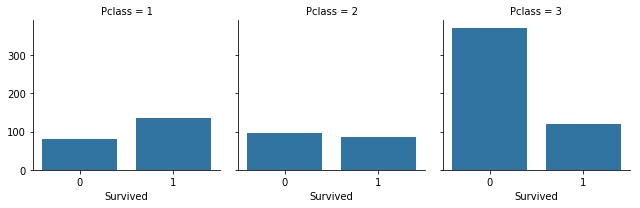

In [12]:
# Analysis
sns.FacetGrid(titanic, col='Pclass').map(sns.countplot, 'Survived', order=[0,1]);

# Modification
col = 'Pclass'
pclass = titanic[col]

onehot = pd.get_dummies(pd.Categorical(pclass), prefix=col)
titanic = pd.concat([titanic, onehot], axis=1).drop(col, axis=1)

## Sex

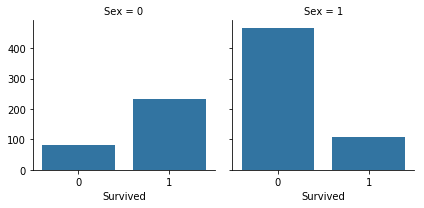

In [13]:
titanic['Sex'] = titanic['Sex'].map({'male': 1, 'female': 0})
sns.FacetGrid(titanic, col='Sex').map(sns.countplot, 'Survived', order=[0,1]);

## Age (Before/After fillna with mean)

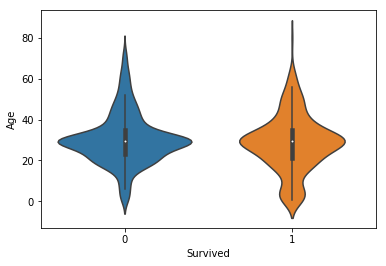

In [14]:
sns.violinplot(x='Survived', y='Age', data=titanic);

## SibSp

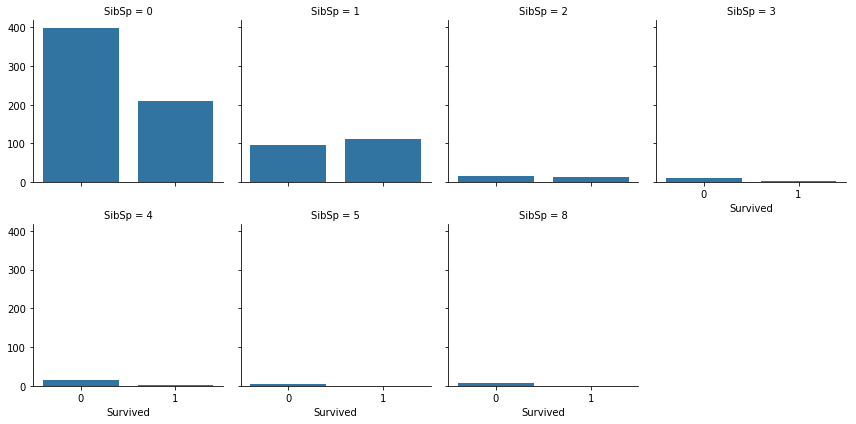

In [15]:
sns.FacetGrid(titanic, col='SibSp', col_wrap=4).map(sns.countplot, 'Survived', order=[0,1]);

## Parch

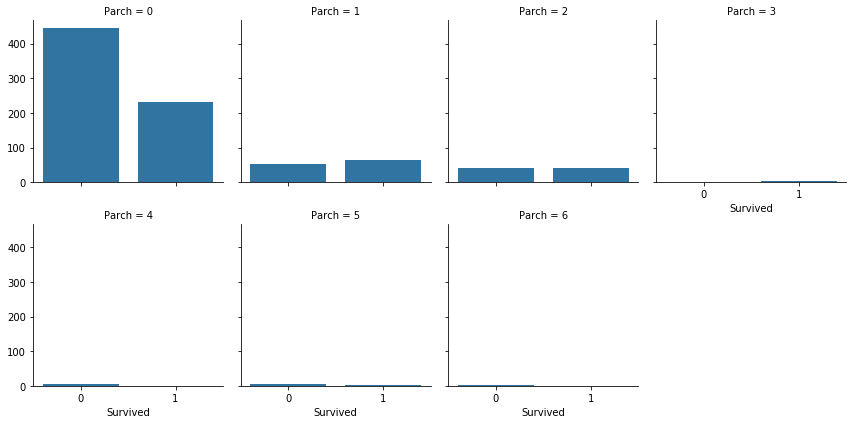

In [16]:
sns.FacetGrid(titanic, col='Parch', col_wrap=4).map(sns.countplot, 'Survived', order=[0,1]);

## Fare

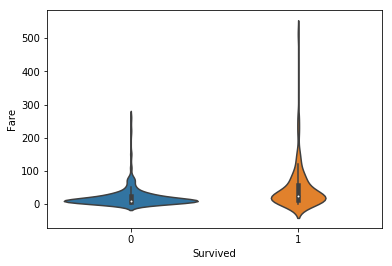

In [17]:
sns.violinplot(x='Survived', y='Fare', data=titanic);

## Embarked

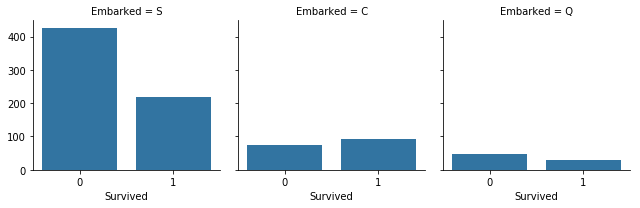

In [18]:
# Analysis
sns.FacetGrid(titanic, col='Embarked').map(sns.countplot, 'Survived', order=[0,1]);

# Modification
col = 'Embarked'
embarked = titanic[col]
onehot = pd.get_dummies(pd.Categorical(embarked), prefix=col)
titanic = pd.concat([titanic, onehot], axis=1).drop(col, axis=1)

---

# Processed data

In [19]:
titanic.sample(10)

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
144,0,1,18.000000,0,0,11.5000,0,1,0,0,0,1
373,0,1,22.000000,0,0,135.6333,1,0,0,1,0,0
714,0,1,52.000000,0,0,13.0000,0,1,0,0,0,1
378,0,1,20.000000,0,0,4.0125,0,0,1,1,0,0
890,0,1,32.000000,0,0,7.7500,0,0,1,0,1,0
593,0,0,29.699118,0,2,7.7500,0,0,1,0,1,0
427,1,0,19.000000,0,0,26.0000,0,1,0,0,0,1
520,1,0,30.000000,0,0,93.5000,1,0,0,0,0,1
200,0,1,28.000000,0,0,9.5000,0,0,1,0,0,1
498,0,0,25.000000,1,2,151.5500,1,0,0,0,0,1


In [20]:
titanic.corr()['Survived'].abs().sort_values(ascending=False)

Survived      1.000000
Sex           0.543351
Pclass_3      0.322308
Pclass_1      0.285904
Fare          0.257307
Embarked_C    0.168240
Embarked_S    0.149683
Pclass_2      0.093349
Parch         0.081629
Age           0.069809
SibSp         0.035322
Embarked_Q    0.003650
Name: Survived, dtype: float64

---

# Preprocessing for training

In [21]:
target = 'Survived'
X, y = titanic.drop(target, axis=1), titanic[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True)

cross_val_4_fold = lambda classifier: cross_val_score(classifier, X, y, cv=4, n_jobs=-1).mean()

---

# Decision Tree

In [44]:
dtc = DecisionTreeClassifier(max_depth=len(X_train.columns)//3, 
#                              min_samples_split=round(len(X_train)*0.05),
#                              min_samples_leaf=round(len(X_train)*0.05),
                             max_features=None,
                             max_leaf_nodes=None,
                            )
cross_val_4_fold(dtc)

0.8181716610107866

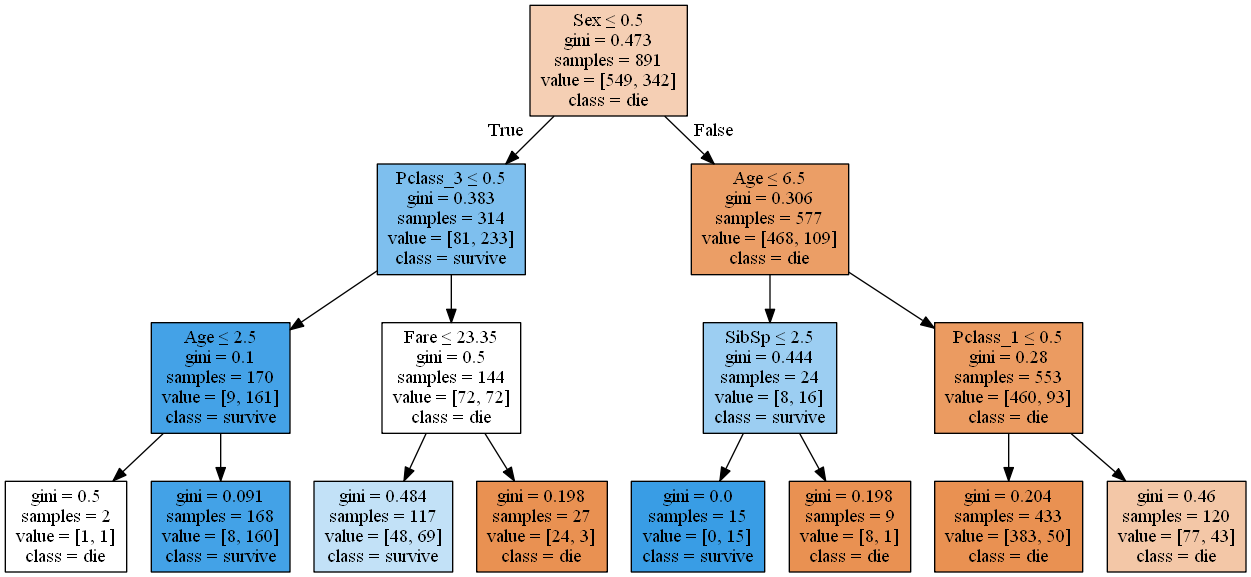

In [45]:
dtc.fit(X, y);

dot_data = StringIO()
export_graphviz(dtc, 
                out_file=dot_data,  
                filled=True, 
                feature_names=list(X_train),
                class_names=['die','survive'],
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
# graph.write_pdf("tree.pdf")

# Random Forest

In [51]:
rfc = RandomForestClassifier(n_estimators=100,
                             max_depth=len(X_train.columns),
#                              min_samples_split=round(len(X_train)*0.01),
#                              min_samples_leaf=round(len(X_train)*0.01),
                             max_features=None,
                             max_leaf_nodes=None,
                             n_jobs=-1,
                            )
cross_val_4_fold(rfc)

0.8260896677026162

---

# Other Classifiers

## SVM

In [25]:
svc = SVC(C=1.0,
          kernel='linear',
          gamma='scale',
          coef0=0.0,
          shrinking=True,
          tol=0.001,
          max_iter=-1,
         )
cross_val_4_fold(svc)

0.7878267190556989

## Logistic Regression (aka logit, MaxEnt) classifier

In [26]:
lr = LogisticRegression(solver='lbfgs', max_iter=1000)
cross_val_4_fold(lr)

0.7946337493002291

## Linear classifiers (SVM, logistic regression, a.o.) with SGD training

In [27]:
sgdc = SGDClassifier(n_jobs=-1)
cross_val_4_fold(sgdc)

0.6018923662211217

## Multi-layer Perceptron classifier

In [28]:
mlpc = MLPClassifier(hidden_layer_sizes=(100,),
                     activation='tanh',
                    )
cross_val_4_fold(mlpc)

0.8036075443236318

## Classifier implementing the k-nearest neighbors vote

In [29]:
knc = KNeighborsClassifier(3)
cross_val_4_fold(knc)

0.6902763589983321

## Gaussian process classification (GPC) based on Laplace approximation

In [30]:
gpc = GaussianProcessClassifier(1.0 * RBF(1.0))
cross_val_4_fold(gpc)

0.577781201484957

## AdaBoost classifier

In [31]:
abc = AdaBoostClassifier()
cross_val_4_fold(abc)

0.8126466272486452

## Gaussian Naive Bayes

In [32]:
gnb = GaussianNB()
cross_val_4_fold(gnb)

0.7566774914728951

## Quadratic Discriminant Analysis

In [33]:
qda = QuadraticDiscriminantAnalysis()
cross_val_4_fold(qda)

0.683630790062965